# Data Science with Amazon SageMaker
_**Using Amazon SageMaker to solve an end-to-end machine learning problem**_

---

Learn to use Amazon SageMaker for creating, tuning, and deploying a machine learning (ML) model for predicting customer churn of a moblile phone service provider.

## Modules

1. [Prepare a dataset for training](#Prepare-a-dataset-for-training)
2. [Train and evaluate a model](#Train-and-evaluate-a-model)
3. [Automatically tune the model](#Automatically-tune-the-model)
4. [Make the model production ready](#Make-the-model-production-ready)
5. [AWS Auto Scaling](#AWS-Auto-Scaling)
6. [Relative cost of errors](#Relative-cost-of-errors)
  
---

## Prepare a dataset for training

### Bank Marketing UCI

You have been asked to develop a machine learning model to predict whether a customer will enroll for a certificate of deposit (CD). The model will be trained on the marketing dataset that contains information on customer demographics, responses to marketing events, and external factors.

### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [82]:
## wget https://sagemaker-sample-data-us-west-2.s3-us-west-2.amazonaws.com/autopilot/direct_marketing/bank-additional.zip
## unzip bank-additional.zip
!head './bank-additional/bank-additional-full.csv'

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no

The above looks like a CSV file with a header row. 

You will use the pandas library for loading and displaying this raw dataset. 

The resulting `dataset` variable is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [93]:
import pandas as pd
dataset = pd.read_csv('./bank-additional/bank-additional-full.csv')
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Let's take a closer look. The dataset has 41187 records. 

Each record uses 21 attributes to describe the profile of a customer. 

The attributes are:
#### bank client data:
- `age` (numeric)
- `job` type of job (categorical)
- `marital` : marital status (categorical)
- `education` (categorical)
- `default`: has credit in default? (categorical)
- `housing`: has housing loan? (categorical)
- `loan`: has personal loan? (categorical)

#### related with the last contact of the current campaign:
- `contact`: contact communication type (categorical) 
- `month`: last contact month of year (categorical)
- `day_of_week`: last contact day of the week (categorical)
- `duration`: last contact duration, in seconds (numeric). Important note: if duration=0 then y="no".

#### other attributes:
- `campaign`: number of contacts performed during this campaign and for this client (numeric)
- `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- `previous`: number of contacts performed before this campaign and for this client (numeric)
- `poutcome`: outcome of the previous marketing campaign (categorical)

#### social and economic context attributes
- `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
- `cons.price.idx`: consumer price index - monthly indicator (numeric)     
- `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)     
- `euribor3m`: euribor 3 month rate - daily indicator (numeric)
- `nr.employed`: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
- `y` - has the client subscribed a term deposit? (binary: "yes","no")

The last attribute, `y`, is known as the *target attribute*&mdash;the attribute that we want the ML model to predict.  Because the target attribute is binary, our model will be performing binary prediction, also known as *binary classification*.

Now, you will explore and visualize the data and the relationships between attributes.

We've already used pandas.  We also recommend using the numpy and/or matplotlib libraries.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

The first step is to use a histogram to see how the values of individual attributes are distributed, as well as compute summary statistics for numeric attributes such as mean, min values, max values, standard deviations, etc. 

For categorical variables we need to see frequency tables. 

While there are several ways to do this in Python&mdash;we are going to use the following pandas functions:[`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist),[`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe),[`crosstab()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html), and[`select_dtypes()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html). 

To show the histograms right in the Jupyter notebook, we will also use the[`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) magic function of IPython.

In [85]:
categorical_feature = dataset.select_dtypes(include=['object']).columns
categorical_feature

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [86]:
# show summary statistics
display(dataset.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


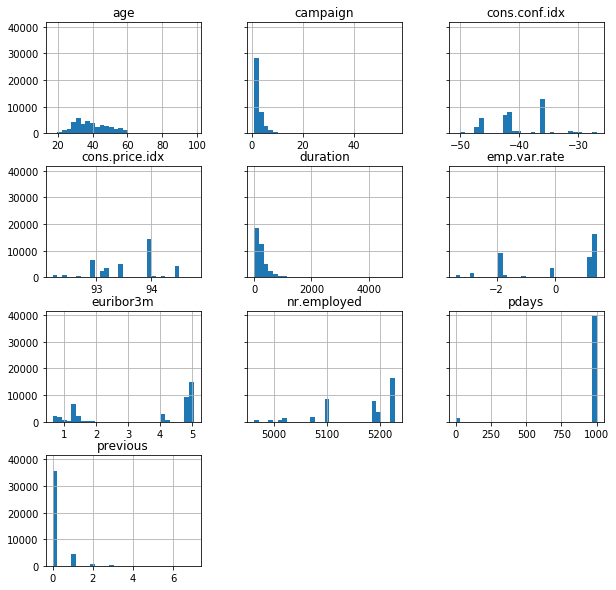

In [87]:
# build histograms for each numeric feature
%matplotlib inline
hist = dataset.hist(bins=30, sharey=True, figsize=(10, 10))

We can see immediately that:
* `day_of_week` appears to be quite evenly distributed
* Only 11% of customers subscribe a term deposit, so there is some class imabalance, but nothing extreme.
* `age` feature is well distributed, it shows bell-like gaussianity.  
* `duration` and `campaign` features are showing exponential-like distribution. 
* We can convert some features to non-numeric.

You can also use the same pandas functions of `crosstab()` and `hist()` to look at how each feature relates to our target variable `y`. 

y,no,yes
job,,
admin.,0.248167,0.291379
blue-collar,0.235745,0.137500
entrepreneur,0.036445,0.026724
housemaid,0.026103,0.022845
management,0.071030,0.070690
retired,0.035187,0.093534
self-employed,0.034804,0.032112
services,0.099759,0.069612
student,0.016417,0.059267


y,no,yes
marital,,
divorced,0.113166,0.102586
married,0.612783,0.545690
single,0.272190,0.349138
unknown,0.001861,0.002586


y,no,yes
education,,
basic.4y,0.102550,0.092241
basic.6y,0.057568,0.040517
basic.9y,0.152457,0.101940
high.school,0.232133,0.222198
illiterate,0.000383,0.000862
professional.course,0.127175,0.128233
university.degree,0.287239,0.359914
unknown,0.040495,0.054095


y,no,yes
default,,
no,0.776814,0.904526
unknown,0.223104,0.095474
yes,0.000082,0.000000


y,no,yes
housing,,
no,0.454088,0.436638
unknown,0.024160,0.023060
yes,0.521752,0.540302


y,no,yes
loan,,
no,0.823574,0.829741
unknown,0.024160,0.023060
yes,0.152266,0.147198


y,no,yes
contact,,
cellular,0.60991,0.830388
telephone,0.39009,0.169612


y,no,yes
month,,
apr,0.057267,0.116164
aug,0.151116,0.141164
dec,0.002545,0.019181
jul,0.178532,0.139871
jun,0.130212,0.120474
mar,0.007388,0.059483
may,0.352495,0.190948
nov,0.100826,0.089655
oct,0.011027,0.067888


y,no,yes
day_of_week,,
fri,0.191009,0.182328
mon,0.209779,0.182543
thu,0.207344,0.225216
tue,0.195277,0.205388
wed,0.196591,0.204526


y,no,yes
poutcome,,
failure,0.099787,0.130388
nonexistent,0.887107,0.676940
success,0.013106,0.192672


age


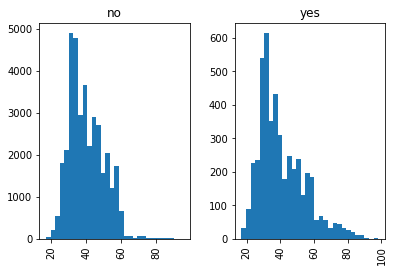

duration


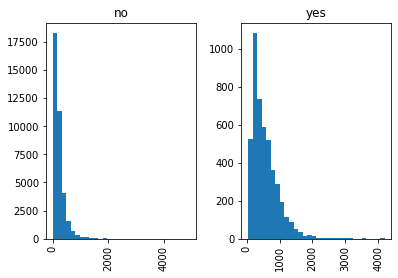

campaign


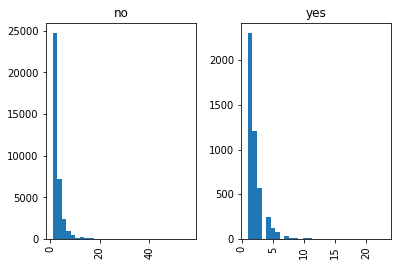

pdays


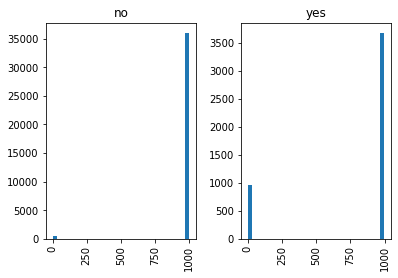

previous


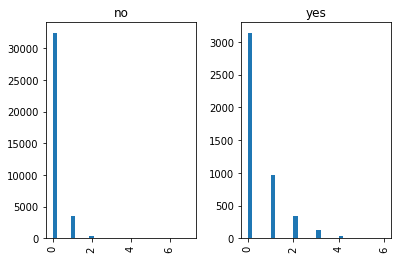

emp.var.rate


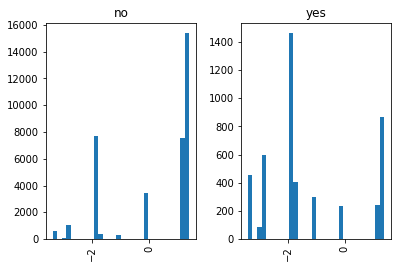

cons.price.idx


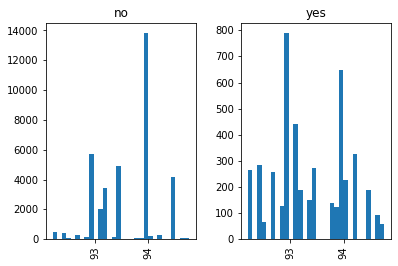

cons.conf.idx


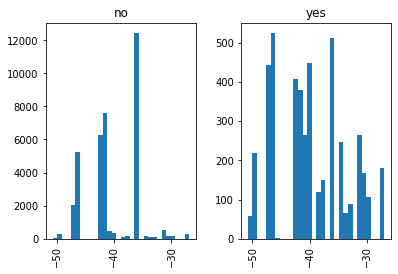

euribor3m


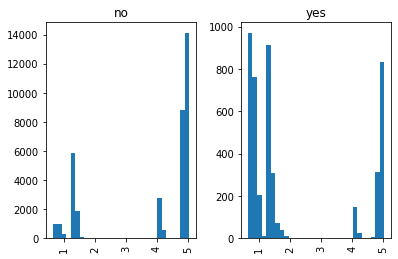

nr.employed


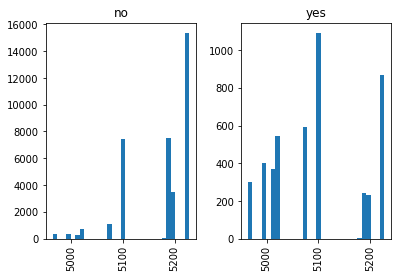

In [88]:
for column in dataset.select_dtypes(include=['object']).columns:
    if column != 'y':
        display(pd.crosstab(
            index=dataset[column], columns=dataset['y'], normalize='columns'))

for column in dataset.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = dataset[[column, 'y']].hist(by='y', bins=30)
    plt.show()

Depending on your analysis, your solution might show different results, but you should see that the client that subscribe a term deposit appear:
* We have a lot of `admin` or `blue-collar` job.
* We have a lot of `high.school`, `professional.course` or `university.degree` education.
* Gaussian-like distribution for eage.

In addition, we see that churners take on very similar distributions for many features.  

That's not surprising; you would expect minutes spent talking to correlate with charges.

We can also examine the pairwise relationships between attributes to see how they are correlated. We can use the pandas functions [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) and [scatter_matrix()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html) pandas functions to achieve this. 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


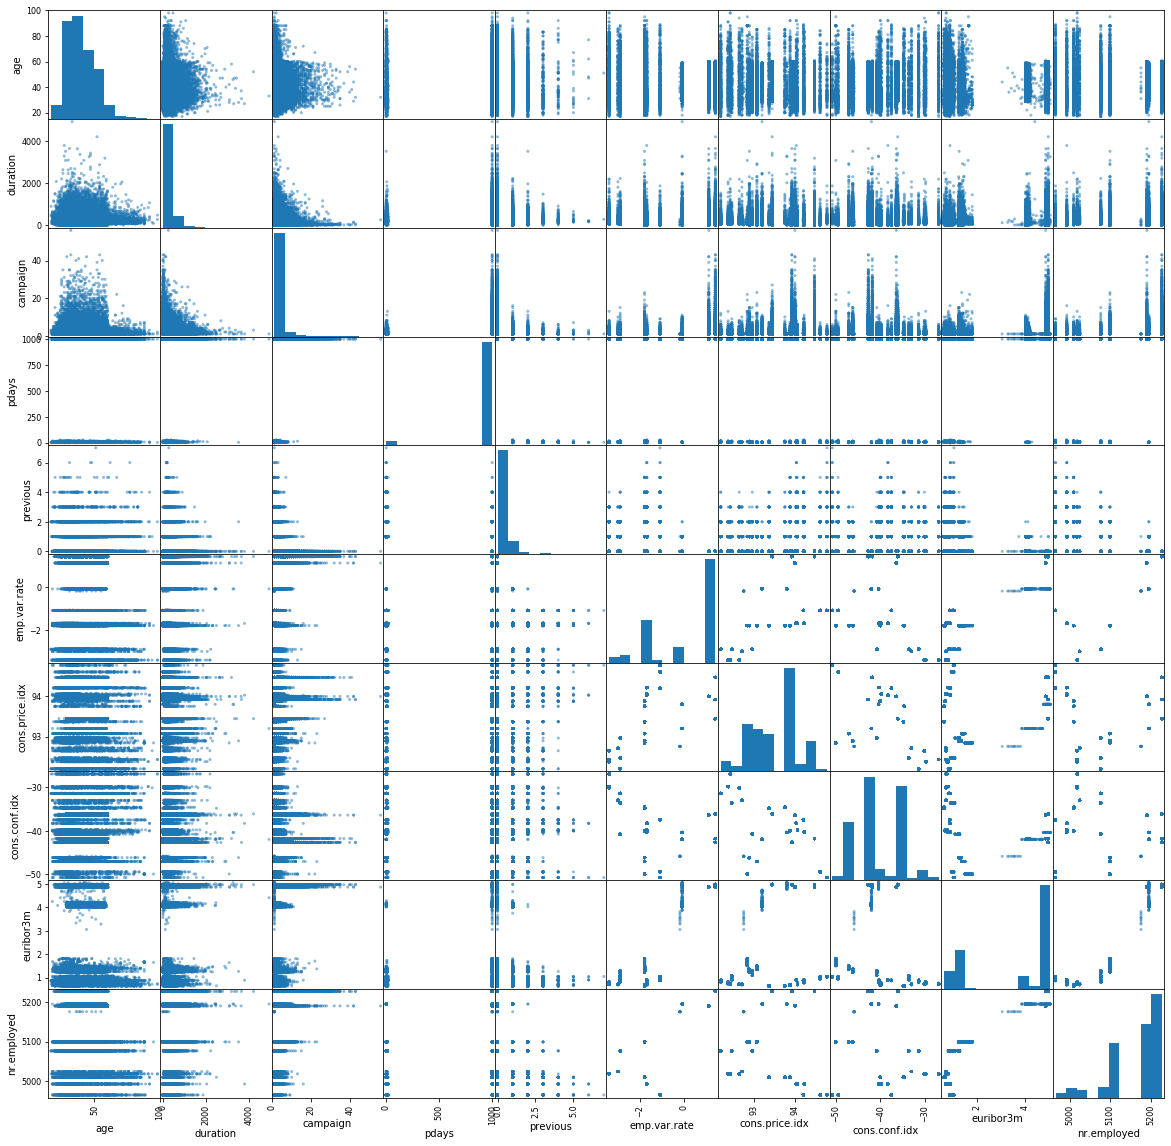

In [89]:
corr=dataset.corr()
display(corr)
pd.plotting.scatter_matrix(dataset, figsize=(20, 20))
plt.show()

In [90]:
corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


You should see several features that essentially have 100 percent correlation with one another.  Including these feature pairs in some machine learning algorithms can create catastrophic problems, while in others it will only introduce minor redundancy and bias.

In preparation for model training, first remove the columns that observed as useless for our purposes. 

Remove the `emp.var.rate`, `cons.price.idx` and `cons.conf.idx` attributes:

In [94]:
dataset = dataset.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx'], axis=1)

Next, remove one feature from each of the highly correlated pairs: 

* `euribor3m` from the pair with `nr.employed`

In [95]:
dataset = dataset.drop(['euribor3m', 'nr.employed'], axis=1)

In [96]:
corr=dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous
age,1.000000,-0.000866,0.004594,-0.034369,0.024365
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000


Now that we have done all of the changes to the data, let's have a last look into how the data looks like before moving to training. 

In [97]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


Convert the categorical features into numeric features.

In [98]:
model_data = pd.get_dummies(dataset)
model_data.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


## Feature Store

In [99]:
from sagemaker.feature_store.feature_group import FeatureGroup
import sagemaker

sagemaker_session = sagemaker.Session()

s3_bucket_name = sagemaker_session.default_bucket()
prefix = "deep-learning-italia-featurestore"
deep_learning_italia_feature_group_name = "FG-deep-learning-italia-355c4d47"

deep_learning_italia_feature_group = FeatureGroup(
    name=deep_learning_italia_feature_group_name, sagemaker_session=sagemaker_session
)

In [100]:
from datetime import datetime

deep_learning_italia_query = deep_learning_italia_feature_group.athena_query()

deep_learning_italia = deep_learning_italia_query.table_name
current_timestamp = int(datetime.now().timestamp())

deep_learning_table = f"""
SELECT *
FROM
    (SELECT *,
         row_number()
        OVER (PARTITION BY FS_ID
    ORDER BY  FS_time desc, Api_Invocation_Time DESC, write_time DESC) AS row_number
    FROM "sagemaker_featurestore"."{deep_learning_italia}"
    where FS_time <= {current_timestamp})
WHERE row_number = 1 and
NOT is_deleted
"""

print("Running " + deep_learning_table)

# Run the Athena query
deep_learning_italia_query.run(
    query_string=deep_learning_table,
    output_location="s3://" + s3_bucket_name + "/" + prefix + "/query_results/",
)

Running 
SELECT *
FROM
    (SELECT *,
         row_number()
        OVER (PARTITION BY FS_ID
    ORDER BY  FS_time desc, Api_Invocation_Time DESC, write_time DESC) AS row_number
    FROM "sagemaker_featurestore"."fg-deep-learning-italia-355c4d47-1639674644"
    where FS_time <= 1640793617)
WHERE row_number = 1 and
NOT is_deleted



'c704b4f2-a58c-406d-9b20-313768523acb'

In [101]:
model_data = deep_learning_italia_query.as_dataframe()
model_data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'fs_id', 'fs_time', 'job_admin', 'job_blue-collar',
       'job_technician', 'job_services', 'job_management', 'job_retired',
       'job_entrepreneur', 'job_self-employed', 'job_housemaid',
       'job_unemployed', 'job_student', 'job_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic_4y', 'education_basic_6y', 'education_basic_9y',
       'education_high_school', 'education_illiterate',
       'education_professional_course', 'education_university_degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_we

In [102]:
model_data.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,fs_id,fs_time,job_admin,job_blue-collar,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes,write_time,api_invocation_time,is_deleted,row_number
0,49,2,999,0,1,0,12578,1.639675e+09,0.0,1.0,...,0,0,1,0,1,0,2021-12-16 17:17:43.071,2021-12-16 17:17:43.071,False,1
1,36,5,999,0,1,0,12582,1.639675e+09,0.0,1.0,...,0,0,1,0,1,0,2021-12-16 17:17:43.071,2021-12-16 17:17:43.071,False,1
2,43,37,999,0,1,0,12593,1.639675e+09,0.0,0.0,...,0,0,1,0,1,0,2021-12-16 17:17:43.071,2021-12-16 17:17:43.071,False,1
3,56,5,999,0,1,0,12599,1.639675e+09,0.0,1.0,...,0,0,1,0,1,0,2021-12-16 17:17:43.071,2021-12-16 17:17:43.071,False,1
4,36,14,999,0,1,0,12609,1.639675e+09,0.0,1.0,...,0,0,1,0,1,0,2021-12-16 17:17:43.071,2021-12-16 17:17:43.071,False,1


## Train and evaluate a model

Now, determine which algorithm to use.  As mentioned above, there appear to be some variables where both high and low (but not intermediate) values are predictive for `y`.  In order to accommodate this in an algorithm like linear regression, we'd need to generate polynomial (or *bucketed*) terms.  

Instead, let's attempt to model this problem using gradient boosted trees.  

Amazon SageMaker provides an XGBoost container that we can use to train in a managed, distributed setting, and then host as a real-time prediction endpoint.  XGBoost uses gradient boosted trees that naturally account for non-linear relationships between features and the target variable, as well as accommodating complex interactions between features.

Amazon SageMaker XGBoost can train on data in either a CSV or LibSVM format.  For this example, we'll stick with CSV.  It should:
* Have the predictor variable in the first column
* Not have a header row

In [103]:
model_data = pd.concat([model_data['y_yes'], model_data.drop(
    ['y_no', 'y_yes'], axis=1)], axis=1)

Now split the data into training, validation, and test sets.  This will help prevent overfitting the model and allow you to test the model's accuracy on data it hasn't already seen.

In [116]:
train_data, validation_data, test_data = np.split(model_data.sample(
    frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])

train_data = train_data.drop(['write_time', 'api_invocation_time', 'is_deleted', 'row_number'], axis=1)
validation_data = validation_data.drop(['write_time', 'api_invocation_time', 'is_deleted', 'row_number'], axis=1)

train_data.to_csv('train.csv', header=False, index=False)
validation_data.to_csv('validation.csv', header=False, index=False)

Upload these files to Amazon S3, where SageMaker expects them.

boto is the standard Python library used to invoke AWS API. The same S3 bucket and prefix will be used for training and model data.  

This should be within the same region as the Notebook Instance, training, and hosting.

In [117]:
import os
import boto3
import sagemaker

sess = sagemaker.Session()

bucket = sess.default_bucket()
prefix = 'bootcamp-xgboost-churn'

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(
    prefix, 'validation/validation.csv')).upload_file('validation.csv')

## Train

Next, specify the locations of the XGBoost algorithm containers.

Amazon SageMaker algorithms are packaged as Docker images. This gives you the flexibility to use almost any algorithm code with Amazon SageMaker, regardless of implementation language, dependent libraries, frameworks, and so on.

In [106]:
# Set the IAM Role
from sagemaker import get_execution_role

role = get_execution_role()
# Get the XGBoost docker image
from sagemaker import image_uris
container = image_uris.retrieve('xgboost', boto3.Session().region_name, '1.3-1')
display(container)

'257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.3-1'

[SageMaker Python SDK](https://sagemaker.readthedocs.io/en/latest/) provides these high-level abstractions for working with Amazon SageMaker:

* Estimators: Encapsulates training on SageMaker.
* Models: Encapsulates built ML models.
* Predictors: Provides real-time inference and transformation using Python data-types against a SageMaker endpoint.
* Session: Provides a collection of methods for working with SageMaker resources.

Start by creating the [xgboost Estimator](https://sagemaker.readthedocs.io/en/latest/estimators.html). The mandatory paramters are: image_name, role, session, instance_type, and instance_count. 

For this training job, use:

* `image_uri = container`
* `role = role`
* `sagemaker_session = sess`
* `instance_count = 1`
* `instance_type = ml.m4.xlarge` 

In [107]:
# Creating the SageMaker Estimator object
import sagemaker
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)

In [108]:
's3://{}/{}/output'.format(bucket, prefix)

's3://sagemaker-us-east-2-669335340622/bootcamp-xgboost-churn/output'

An ML algorithm is configured and tuned based on its hyperparameters, which change the way the algorithm works.

The XGBoost hyperparamaters are described in the [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/parameter.html)

For this example, the required hyperparameters for XGBoost are:

* `objective` - Specifies the learning task and the corresponding learning objective. please use **binary:logistic** for binary classification task.  
* `num_round` - controls the number of rounds. Each round is trained using the output from the previous one. More rounds should produce a better fit on the training data, but can be computationally expensive or lead to overfitting.

A few other key hyperparameters are:

* `max_depth` controls how deep each tree within the algorithm can be built. Deeper trees can lead to better fit, but are more computationally expensive and can lead to overfitting. There is typically some trade-off in model performance that needs to be explored between a large number of shallow trees and a smaller number of deeper trees.
* `subsample` controls sampling of the training data. This technique can help reduce overfitting, but setting it too low can also starve the model of data.
* `eta` controls how aggressive each round of boosting is. Larger values lead to more conservative boosting.
* `gamma` controls how aggressively trees are grown. Larger values lead to more conservative models.

We can use xgb.set_hyperparameters to set the hyperparameters.

In [109]:
# Set the hyperparameters
xgb.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        #silent=0,
                        eval_metric='error',
                        objective='binary:logistic',
                        num_round=100)

Then, because you're training with the CSV file format, create s3_inputs the training function can use as a pointer to the files in Amazon S3.

In [110]:
# Configuring the data inputs
s3_input_train = sagemaker.inputs.TrainingInput(
    s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = sagemaker.inputs.TrainingInput(
    s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')

Finally, you are ready to train. 

To train, use the fit() function.

In [111]:
# Training the model
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

2021-12-29 16:00:56 Starting - Starting the training job...
2021-12-29 16:01:19 Starting - Launching requested ML instancesProfilerReport-1640793656: InProgress
...
2021-12-29 16:01:46 Starting - Preparing the instances for training............
2021-12-29 16:03:48 Downloading - Downloading input data...
2021-12-29 16:04:20 Training - Downloading the training image...
2021-12-29 16:04:56 Uploading - Uploading generated training model.[2021-12-29 16:04:48.263 ip-10-0-93-53.us-east-2.compute.internal:1 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-12-29:16:04:48:INFO] Imported framework sagemaker_xgboost_container.training
[2021-12-29:16:04:48:INFO] Failed to parse hyperparameter eval_metric value error to Json.
Returning the value itself
[2021-12-29:16:04:48:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2021-12-29:16:04:48:INFO] No GPUs detected (normal if no gpus installed)
[2021-12-29:16:04:48:INFO] Running XGBoo

Now create a model and deploy it to a hosted endpoint using the deploy API of SageMaker [estimator](https://sagemaker.readthedocs.io/en/latest/estimators.html).  

In [112]:
# Deploy the model
Variant = 'AllTraffic'  # Configure the default deployment variant

from sagemaker.predictor import CSVSerializer

xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge',
                           serializer=CSVSerializer())

------!

### Evaluate

Now make real-time predictions from your model by making an http POST request.  

Use a simple function to:

1. Loop over your test dataset
2. Split it into mini-batches of rows 
3. Convert those mini-batchs to CSV string payloads
4. Retrieve mini-batch predictions by invoking the XGBoost endpoint
5. Collect predictions and convert from the CSV output your model provides into a NumPy array

In [113]:
test_data = test_data.drop(['write_time', 'api_invocation_time', 'is_deleted', 'row_number'], axis=1)

In [114]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.to_numpy()[:, 1:])

Assess the performance of your ML model by comparing actual values to predicted values.

In this case, you will predict whether the customer churned (`1`) or not (`0`), which produces a simple confusion matrix.

In [115]:
pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,3596,56
1,352,115


_Note: Due to randomized elements of the algorithm, your results may differ slightly._

Of the 48 churners, 39 were correcly predicted. (True positives.) Four were incorrectly predited; they ended up not churning. (False postives.) 

Another nine customers did end up churning when we predicted they would not.  (False negatives.)

**Important:** Because of the`np.round()`function above, we are using a simple threshold (or cutoff) of 0.5.  

Our predictions from `xgboost` come out as continuous values between 0 and 1 and are forced into the binary classes that we began with.

## Automatically tune the model

### Model hyperparameter tuning for XGBoost

Automatic model tuning, or *hyperparameter tuning*, finds the best version of a model by running many jobs that test a range of hyperparameters on your dataset. 

You choose the tunable hyperparameters, a range of values for each, and an objective metric. Objective metrics are chosen from the metrics that the algorithm computes. 

Automatic model tuning searches the hyperparameters chosen to find the combination of values that result in the model that optimizes the objective metric.

For more information about model tuning, see [Automatic Model Tuning](https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning.html).  

In [118]:
# Recreate the Estimator from above
xgb = sagemaker.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(
                                        bucket, prefix),
                                    sagemaker_session=sess)

For each tuning job, you can configure a set of static hyperparameters and range of tuneable hyperparameters.  

Use the IntegerParameter, CategoricalParameter, and ContinuousParameter objects to assign values to the hyperparameter_ranges variable.  (This variable is a dictionary data type.)

In [119]:
from sagemaker.tuner import IntegerParameter, CategoricalParameter, ContinuousParameter

xgb.set_hyperparameters(max_depth=5,
                        gamma=4,
                        subsample=0.8,
                        eval_metric='error',
                        objective='binary:logistic',
                        num_round=100)

hyperparameter_ranges = {
    'eta': ContinuousParameter(0, 1),
    'min_child_weight': IntegerParameter(1, 10),
    'alpha': ContinuousParameter(0, 2),
    'max_depth': IntegerParameter(1, 10),
}

Next, specify the objective metric to tune and its definition.  The definition includes the regular expression (regex) needed to extract that metric from the CloudWatch logs of the training job. 

The XGBoost algorithm computes nine [metrics](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-tuning.html) during training that can be used as objective metrics.

In this case, you only need to specify the metric name.  You do not need to provide regex. 

In [120]:
# Compete the statement
objective_metric_name='validation:error'

Now, we'll create a HyperparameterTuner object, to which we pass:

* XGBoost estimator
* Hyperparameter ranges 
* Objective metric name
* Tunning job configuration

Create the [HyperparameterTuner](https://sagemaker.readthedocs.io/en/latest/tuner.html) object. 

The mandatory parameters are: 

* `estimator`
* `objective_metric_name`
* `hyperparameter_ranges`
* `objective_type`
* `max_jobs` 
* `max_parallel_jobs`


In [121]:
# Hyperparameter tunning job
from sagemaker.tuner import HyperparameterTuner

tuner = HyperparameterTuner(estimator=xgb,
                            objective_metric_name=objective_metric_name,
                            hyperparameter_ranges=hyperparameter_ranges,
                            objective_type='Minimize',
                            max_jobs=9,
                            max_parallel_jobs=3)

#### Build the training model!

In [122]:
tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})
tuner.wait()

................................................................................................................................................................!
!


After tuning the model using the Hyperparameter tunning job, deploy the new model to the endpoint created previously.


## Deploy the new trained model

Amazon SageMaker includes built-in A/B testing capabilities that help you test your model and experiment with different versions to achieve the best results.  

Start by examining the results of the tuning job.

To monitor the progress and completion of the hyperparameter tuning job, check the section “Hyperparameter tuning jobs” section of the SageMaker console. 

This cell checks the status of hyperparameter tuning job, programatically.

In [138]:
from pprint import pprint
sage_client = sess.sagemaker_client
tuning_job_name = tuner.latest_tuning_job.job_name

# run this cell to check current status of hyperparameter tuning job
tuning_job_result = sage_client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=tuning_job_name)

status = tuning_job_result['HyperParameterTuningJobStatus']
if status != 'Completed':
    print("The tuning job has not been completed.")

job_count = tuning_job_result['TrainingJobStatusCounters']['Completed']
print("%d training jobs have completed\n" % job_count)

if tuning_job_result.get('BestTrainingJob', None):
    print("Best model found so far:")
    pprint(tuning_job_result['BestTrainingJob'])
else:
    print("No training jobs have reported results yet.")

9 training jobs have completed

Best model found so far:
{'CreationTime': datetime.datetime(2021, 12, 29, 16, 24, 59, tzinfo=tzlocal()),
 'FinalHyperParameterTuningJobObjectiveMetric': {'MetricName': 'validation:error',
                                                 'Value': 0.10232999920845032},
 'ObjectiveStatus': 'Succeeded',
 'TrainingEndTime': datetime.datetime(2021, 12, 29, 16, 28, 48, tzinfo=tzlocal()),
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-2:669335340622:training-job/sagemaker-xgboost-211229-1615-008-7daf43d4',
 'TrainingJobName': 'sagemaker-xgboost-211229-1615-008-7daf43d4',
 'TrainingJobStatus': 'Completed',
 'TrainingStartTime': datetime.datetime(2021, 12, 29, 16, 27, 26, tzinfo=tzlocal()),
 'TunedHyperParameters': {'alpha': '1.9229719801228988',
                          'eta': '0.05714031011431087',
                          'max_depth': '9',
                          'min_child_weight': '7'}}


Once the training jobs have completed, deploy the best model to the endpoint.

In [124]:
# Create a SageMaker model from the best model
tuned_model_name = sess.create_model_from_job(training_job_name=tuner.best_training_job(), role=role)
tuned_model_name

'sagemaker-xgboost-211229-1615-008-7daf43d4'

### Create variants

We now create two variants, each with its own different model (these could also have different instance types and counts).

We set an initial_weight of “1” for both variants: this means 50% of our requests go to Variant1, and the remaining 50% of all requests to Variant2. (The sum of weights across both variants is 2 and each variant has weight assignment of 1. This implies each variant receives 1/2, or 50%, of the total traffic.)

In [125]:
from sagemaker.session import production_variant

# From the model, create a new SageMaker endpoint configuration.
# Get the current endpoint configuration
endpoint = sage_client.describe_endpoint(EndpointName=xgb_predictor.endpoint_name)
endpoint_config = sage_client.describe_endpoint_config(EndpointConfigName=endpoint['EndpointConfigName'])
current_variant_config = endpoint_config['ProductionVariants'][0]
current_model_name = current_variant_config["ModelName"]

tuned_model_config = production_variant(
    model_name=tuned_model_name,
    instance_type="ml.m4.xlarge",
    initial_instance_count=1,
    variant_name="TunedXGBoost",
    initial_weight=0.5,
)


current_model_config = production_variant(
    model_name=current_model_name,
    instance_type="ml.m4.xlarge",
    initial_instance_count=1,
    variant_name="XGBoost",
    initial_weight=0.5,
)

(tuned_model_config, current_model_config)

({'ModelName': 'sagemaker-xgboost-211229-1615-008-7daf43d4',
  'InstanceType': 'ml.m4.xlarge',
  'InitialInstanceCount': 1,
  'VariantName': 'TunedXGBoost',
  'InitialVariantWeight': 0.5},
 {'ModelName': 'sagemaker-xgboost-2021-12-29-16-05-39-505',
  'InstanceType': 'ml.m4.xlarge',
  'InitialInstanceCount': 1,
  'VariantName': 'XGBoost',
  'InitialVariantWeight': 0.5})

In [126]:
import os, hashlib
hash_value = hashlib.md5(os.urandom(32)).hexdigest()[:7]

# Create the new endpoint configuration
sage_client.create_endpoint_config(
    EndpointConfigName=f'AB-Config-{hash_value}',
    ProductionVariants=[current_model_config,
                        tuned_model_config])

# Update the endpoint
sage_client.update_endpoint(
    EndpointName=endpoint['EndpointConfigName'],
    EndpointConfigName=f'AB-Config-{hash_value}'
)

result = sess.wait_for_endpoint(endpoint['EndpointConfigName'])

---------------!

In the SageMaker console, you'll be able to see that the endpoint now sends 50 percent of the traffic to the old model and 50 percent of it to the new one.  

Create a new crosstab and make sure that everything works as expected. 

In [127]:
def predict(data, rows=500, target_variant=None):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array, target_variant=target_variant).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

In [131]:
# test_data = test_data.drop(['write_time', 'api_invocation_time', 'is_deleted', 'row_number'], axis=1)

In [139]:
predictions = predict(test_data.to_numpy()[:, 1:])

pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,3595,57
1,354,113


### Invoke a specific variant

Now, let’s use the new feature that was released today to invoke a specific variant. For this, we simply use the new parameter to define which specific ProductionVariant we want to invoke. Let us use this to invoke Variant1 for all requests.

In [140]:
predictions = predict(test_data.to_numpy()[:, 1:], target_variant=tuned_model_config["VariantName"])

pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,3595,57
1,354,113


In [142]:
predictions = predict(test_data.to_numpy()[:, 1:], target_variant=current_model_config["VariantName"])

pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,3596,56
1,352,115


If it worked as expected (no errors), you can send all traffic to the new model.

In [137]:
sage_client.update_endpoint_weights_and_capacities(
    EndpointName=endpoint['EndpointConfigName'],
    DesiredWeightsAndCapacities=[
        {
            'VariantName': 'TunedXGBoost', 
            'DesiredWeight': 1
        },
        {
            'VariantName': 'XGBoost',
            'DesiredWeight': 0
        }
    ]
)
response = sess.wait_for_endpoint(endpoint['EndpointConfigName'])

---!

Now, create a new crosstab for the new model.

In [143]:
def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join(
            [predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.to_numpy()[:, 1:])

pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(
    predictions), rownames=['actual'], colnames=['predictions'])

predictions,0.0,1.0
actual,,
0,3595,57
1,354,113


## Make the model production-ready

###  AWS Auto Scaling

As your endpoint goes into production, depending on your needs and expected traffic, throughput from a single endpoint might result in a bad experience under high load for users. 

Under heavy load, an endpoint behaves like a web server. When requests take more time to fulfill (the throughput of the endpoint is decreasing), the endpoint could start issuing errors due to timeouts and regular instance metrics (such as CPU utilization) will reach maximum utilization. 

In order to mitigate such a situation, you could provision more instances to back the endpoint serving your model, but this will not dynamically adapt to the traffic and load you are receiving. 

With AWS Auto Scaling for Amazon SageMaker, you don't have to closely monitor inference volume and manually change the endpoint configuration. Instead, configure a scaling policy to be used by AWS Auto Scaling. 

Auto Scaling adjusts the number of instances up or down in response to actual workloads, determined by using Amazon CloudWatch metrics and target values defined in the policy. 

Before putting AWS Auto Scaling in place for your last endpoint, first monitor how the endpoint behaves under load to understand which metrics to track. 

Create two helper functions that will be in charge of load testing the endpoint by sending requests with some sample data. 

In [144]:
import botocore
import concurrent.futures
import requests
import time

NB_CONNECTIONS = 200

# Update number of connections in the pool accepted by the sagemaker runtime client
client = boto3.client('sagemaker-runtime',
                      config=botocore.client.Config(max_pool_connections=NB_CONNECTIONS))
sess.sagemaker_runtime_client = client

# Send data for prediction to endpoint
def send_data():
    return xgb_predictor.predict([i for i in range(66)])

# Send nb_requests to endpoint nb_repetitions
def load_test_endpoint(nb_requests, nb_repetitions):
    for _ in range(nb_repetitions):
        out = []
        with concurrent.futures.ThreadPoolExecutor(max_workers=NB_CONNECTIONS) as executor:
            future_submit = (executor.submit(send_data)
                             for _ in range(nb_requests))
            time1 = time.time()
            for future in concurrent.futures.as_completed(future_submit):
                try:
                    data = future.result()
                except Exception as exc:
                    data = str(type(exc))
                finally:
                    out.append(data)

                    print(str(len(out)), end="\r")

            time2 = time.time()

        # Print time taken for nb_requests
        print(f'Took {time2-time1:.2f} s for {nb_requests} requests')

Now use the helper function and send a batch of 200 requests, with 180 repetitions of this batch.  This should take, on average, less than a second.  The total run time will be just under 3 minutes. 

In [145]:
load_test_endpoint(nb_requests=200, nb_repetitions=180)

Took 1.31 s for 200 requests
Took 0.90 s for 200 requests
Took 0.88 s for 200 requests
Took 0.95 s for 200 requests
Took 0.89 s for 200 requests
Took 0.78 s for 200 requests
Took 0.86 s for 200 requests
Took 0.72 s for 200 requests
Took 0.83 s for 200 requests
Took 0.95 s for 200 requests
Took 0.88 s for 200 requests
Took 0.84 s for 200 requests
Took 0.80 s for 200 requests
Took 0.91 s for 200 requests
Took 0.72 s for 200 requests
Took 0.85 s for 200 requests
Took 0.83 s for 200 requests
Took 0.90 s for 200 requests
Took 0.72 s for 200 requests
Took 0.67 s for 200 requests
Took 0.72 s for 200 requests
Took 0.78 s for 200 requests
Took 1.07 s for 200 requests
Took 0.87 s for 200 requests
Took 0.74 s for 200 requests
Took 0.71 s for 200 requests
Took 0.82 s for 200 requests
Took 0.75 s for 200 requests
Took 0.77 s for 200 requests
Took 0.74 s for 200 requests
Took 0.93 s for 200 requests
Took 0.81 s for 200 requests
Took 0.72 s for 200 requests
Took 0.73 s for 200 requests
Took 0.89 s fo

Put your endpoint under load by testing it with 50k requests. 

Keep it short, with only 1 repetition of the batch of 50k requests. 

In [146]:
load_test_endpoint(nb_requests=50000, nb_repetitions=1)

Took 212.61 s for 50000 requests


You now have enough data points for measuring performance of the endpoint and you can display them using CloudWatch Metrics. 

Explore the different metrics available for your SageMaker endpoint, and make sure you can see metrics generated by the first load test you performed. 

On the SageMaker console, navigate to your endpoint and check out the links in the monitor section. Alternatively, run the following cell and open the link:

In [147]:
from IPython.display import Markdown as md

link = 'https://' + boto3.Session().region_name + '.console.aws.amazon.com/cloudwatch/home?region=' + boto3.Session().region_name + \
    '#metricsV2:namespace=AWS/SageMaker;dimensions=EndpointName,VariantName;search=' + \
    xgb_predictor.endpoint_name

md("**Caution**: *Ctrl + click* the link to not loose the current tab with the notebook: [%s](%s)" % (link, link))

**Caution**: *Ctrl + click* the link to not loose the current tab with the notebook: [https://us-east-2.console.aws.amazon.com/cloudwatch/home?region=us-east-2#metricsV2:namespace=AWS/SageMaker;dimensions=EndpointName,VariantName;search=sagemaker-xgboost-2021-12-29-16-05-39-505](https://us-east-2.console.aws.amazon.com/cloudwatch/home?region=us-east-2#metricsV2:namespace=AWS/SageMaker;dimensions=EndpointName,VariantName;search=sagemaker-xgboost-2021-12-29-16-05-39-505)

So that you can closely monitor the performance your endpoint, create a dashboard in Amazon CloudWatch with some of the metrics that you found above, set a scale of one hour's worth of data, and, if you prefer, set auto-refresh to avoid manually refreshing the dashboard.

Alternatively, we have provided a template Amazon CloudWatch dashboard you can automatically deploy using AWS CloudFormation. 

Download the template by opening `dashboard/template-cloudwatch.yaml` from the current folder. Then head over to AWS CloudFormation, and select 'Create Stack', and then 'Upload a template to Amazon S3' by selecting the downloaded template.

You will need the endpoint and variant name when you deploy it using AWS CloudFormation. Once created, you can look into the result of the deployment for a direct URL to the dashboard. 

In [151]:
variant_name = "TunedXGBoost"

print("Endpoint name: " + xgb_predictor.endpoint)
print("Variant name: " + variant_name)

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Endpoint name: sagemaker-xgboost-2021-12-29-16-05-39-505
Variant name: TunedXGBoost


Notice that most metrics went up with the final bigger batch of requests. Let's say that this endpoint is serving a large number of requests on a regular basis to determine whether customers are likely to churn, and we want to define a reasonable value for the desired throughput to sustain. We could measure this in Requests Per Minute (or RPS), and define that the endpoint needs to sustain up to 10,000 requests to provide answers to all customers before they experience delays or even errors.

Below we have defined a simple formula to compute the throughput value used to auto scale following the recommendations in the [load testing guide](https://docs.aws.amazon.com/sagemaker/latest/dg/endpoint-scaling-loadtest.html). 

In [152]:
MAX_RPS = 10000 
SAFETY_FACTOR = .5

INVOCATIONS_PER_INSTANCE_THRESHOLD = (MAX_RPS * SAFETY_FACTOR)
print(INVOCATIONS_PER_INSTANCE_THRESHOLD)

5000.0


Note the safety factor, which is important as you need to account for situations where the endpoint might behave differently than when the load test was performed, and external factors out of your own reach. 

The result of this formula will be used as the threshold for the number of invocations per instance that when reached, will trigger the endpoint to auto scale and add an additional instance to back the endpoint. 

To achieve this objective, register a scalable target with AWS Auto Scaling to define what to auto-scale (e.g. the number of instances), as well as the minimum and maximum capacity.  

You can set the minimum and maximum capacity to 1 and 3 respectively.

We can use the `register_scalable_target` [API method](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/application-autoscaling.html#ApplicationAutoScaling.Client.register_scalable_target) of the Auto Scaling API, and the pre-computed `resource_name` for the `ResourceId`. 

In [158]:
autoscaling_client = boto3.client('application-autoscaling')
resource_name = 'endpoint/' + xgb_predictor.endpoint_name + '/variant/' + variant_name

response = autoscaling_client.register_scalable_target(
    ServiceNamespace='sagemaker',
    ResourceId=resource_name,
    ScalableDimension='sagemaker:variant:DesiredInstanceCount',
    MinCapacity=1,
    MaxCapacity=5
)

Now that the endpoint's number of instances is registered as a scalable target, it's available to automatically scale up and down. 

To enable this behavior, create a scaling policy that defines what metrics AWS Auto Scaling needs to track and against what value. 

In this case, the endpoint should scale when the threshold we defined has been reached. 

We can read more about the `put_scaling_policy` [API method](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/application-autoscaling.html#ApplicationAutoScaling.Client.put_scaling_policy) to understand how to complete the values. 

In [155]:
response = autoscaling_client.put_scaling_policy(
    PolicyName='xgb-endpoint-throughput-threshold',
    ServiceNamespace='sagemaker',
    ResourceId=resource_name,
    ScalableDimension='sagemaker:variant:DesiredInstanceCount',
    PolicyType='TargetTrackingScaling',
    TargetTrackingScalingPolicyConfiguration={
        'TargetValue': INVOCATIONS_PER_INSTANCE_THRESHOLD,
        'PredefinedMetricSpecification': {
            'PredefinedMetricType': 'SageMakerVariantInvocationsPerInstance'
        },
        'ScaleOutCooldown': 200,
        'ScaleInCooldown': 200,
        'DisableScaleIn': False
    }
)

Put the endpoint under heavy load again and watch AWS Auto Scaling activate.  

Send it another batch of 50k requests and 10 repetitions.

In [156]:
load_test_endpoint(nb_requests=50000, nb_repetitions=10)

Took 212.09 s for 50000 requests
Took 126.75 s for 50000 requests
Took 215.29 s for 50000 requests
Took 131.23 s for 50000 requests
Took 122.12 s for 50000 requests


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-144-b1f23d73d7fb>", line 25, in load_test_endpoint
    for future in concurrent.futures.as_completed(future_submit):
  File "/opt/conda/lib/python3.7/concurrent/futures/_base.py", line 240, in as_completed
    waiter.event.wait(wait_timeout)
  File "/opt/conda/lib/python3.7/threading.py", line 552, in wait
    signaled = self._cond.wait(timeout)
  File "/opt/conda/lib/python3.7/threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-156-ffb74e001160>", line 1, in <module>
    load_test_endpoint(nb_requests=50000, nb_repetitions=10)
  File "<ipython-input-144-b1f23d73d7fb>", line 35, in load_test_endpoint
    time2 = time.time()
  F

KeyboardInterrupt: 

By looking at the dashboard created earlier, can you see when auto scaling kicked in? 

The number of invocations per instance should have dropped below the target, and the invocations graph will now display 2 separate lines for the Invocations and InvocationsPerInstance. 

This clearly indicates that the model is being served from multiple instances and decreases the load.

If you let the above cell continue to run for longer, you might witness the endpoint scaling in. It will go back to a single instance. 

With multiple instances behind an endpoint, you are maintaining a throughput lower on average than the target we set. AWS Auto Scaling is set up to track 5000 requests per minute. An alarm will trigger an auto-scaling policy if too many data points are under 5000, which can be the case here. 

In a production setting, you would use a more robust load testing tool to perform a true load test and determine the exact throughput (or other metric) that your endpoint can sustain under heavy load until it starts responding with errors. 

### Clean-up

If you're done with this notebook, please run the cell below to remove the hosted endpoint and avoid any charges from any stray instances being left on.

In [ ]:
sagemaker.Session().delete_endpoint(xgb_predictor.endpoint_name)